<a href="https://colab.research.google.com/github/Bhavin52/Case_Study/blob/main/senpdeal_Product_Review_Sentiment_Analysis_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [28]:
df = pd.read_csv("/content/Snapdeal.csv",encoding= 'unicode_escape')

In [29]:
affin=pd.read_csv('/content/Afinn.csv',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [30]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [31]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [32]:
calculate_sentiment(text='great')

3

In [33]:
# Calculating sentiment value for each sentence
df['sentiment_value']=df['sentence'].apply(calculate_sentiment)
df['sentiment_value']

0      3
1      0
2      0
3      5
4      1
      ..
143    3
144    3
145    5
146    1
147    2
Name: sentiment_value, Length: 148, dtype: int64

In [34]:
df['word_count']=df['sentence'].str.split().apply(len)
df['word_count']

0      6
1      6
2      4
3      2
4      5
      ..
143    2
144    2
145    8
146    3
147    9
Name: word_count, Length: 148, dtype: int64

In [35]:
df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
127,no lagging till today,-3,4
61,Apple is quality product. Only problem is you ...,-3,13
65,'They have sold this Iphone on interest free ...,-2,48
60,Do not hang. Samsung products are pathetic. U...,-2,21
52,'Lacks the feel.',-2,3
...,...,...,...
116,'Worth in this price. Excellent features. Ove...,8,10
104,'I have got ths phone in perfect condition an...,9,22
111,'Great product at such amazing price. Deliver...,11,13
30,'It is a nice phone by Apple. Camera is good ...,11,19


In [36]:
# Sentiment score of the whole review
df['sentiment_value'].describe()

count    148.000000
mean       2.466216
std        3.015641
min       -3.000000
25%        0.000000
50%        2.500000
75%        4.000000
max       20.000000
Name: sentiment_value, dtype: float64

In [37]:
# negative sentiment score of the whole review
df[df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,'Good i phone mobile oparating essy,0,6
2,inter net fast working',0,4
7,'This is the first iPhone that I bought. Afte...,0,14
9,thought of going for iPhone. Though,0,6
10,I didnt want to go for iPhone 6S as it was ve...,-1,16
11,decided that I will buy iPhone 5C.,0,7
13,the delivery was very prompt as well.,0,7
14,Pros: Sleek phone,0,3
16,no lags,-2,2
18,got upgrade to iOS 9,0,5


In [38]:
# positive sentiment score of the whole review
df[df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,['I am really happy with product',3,6
3,'Superb model,5,2
4,snapdeal delivered as promised time',1,5
5,'Very good one perfectly the original one wit...,6,11
6,'Bought this for my dear wife as a surprise. ...,2,13
...,...,...,...
143,'Good price,3,2
144,Great phone,3,2
145,very happy to own one. Recommending to everyone',5,8
146,'dream come true',1,3


In [39]:
# Adding index cloumn
df['index']=range(0,len(df))
df

,sentence,sentiment_value,word_count,index
0,['I am really happy with product',3,6,0
1,'Good i phone mobile oparating essy,0,6,1
2,inter net fast working',0,4,2
3,'Superb model,5,2,3
4,snapdeal delivered as promised time',1,5,4
...,...,...,...,...
143,'Good price,3,2,143
144,Great phone,3,2,144
145,very happy to own one. Recommending to everyone',5,8,145
146,'dream come true',1,3,146


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


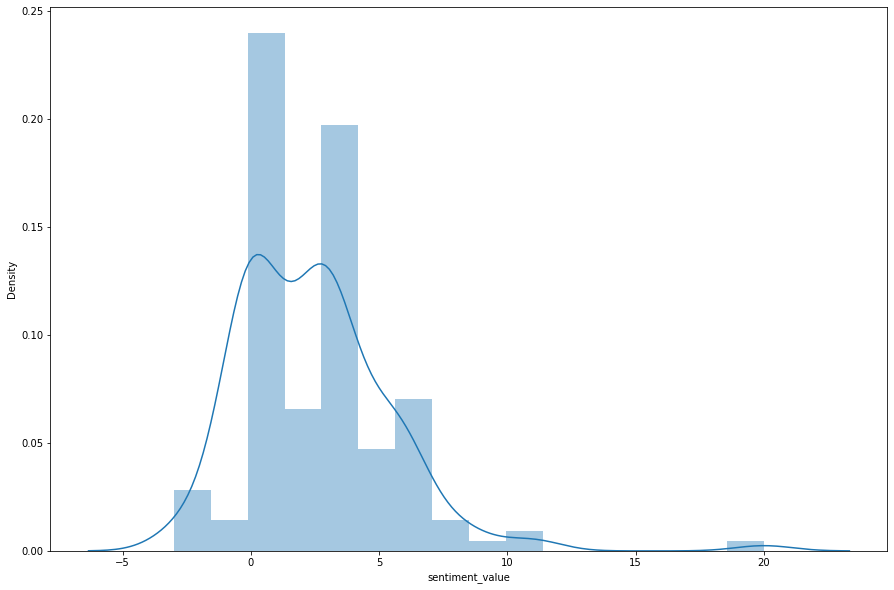

In [40]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['sentiment_value'])

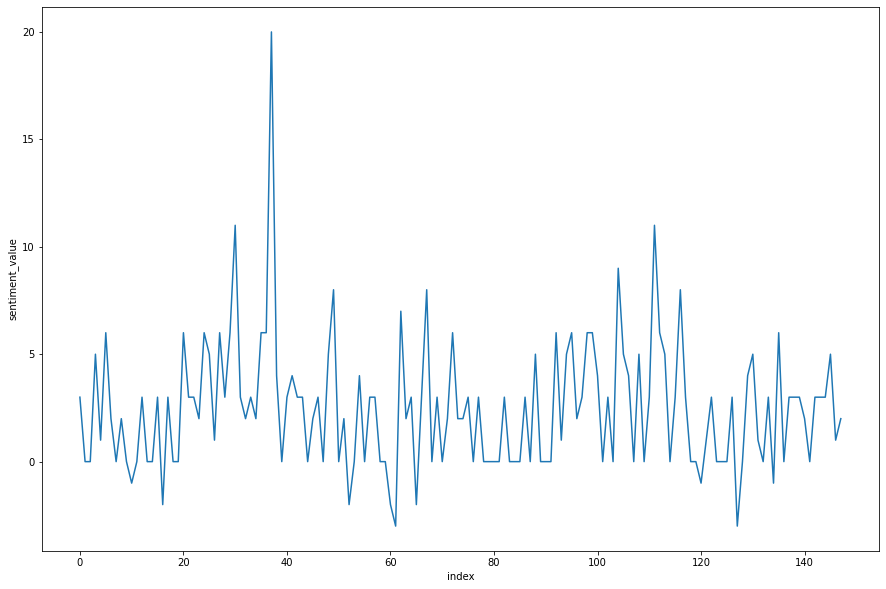

In [41]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=df)

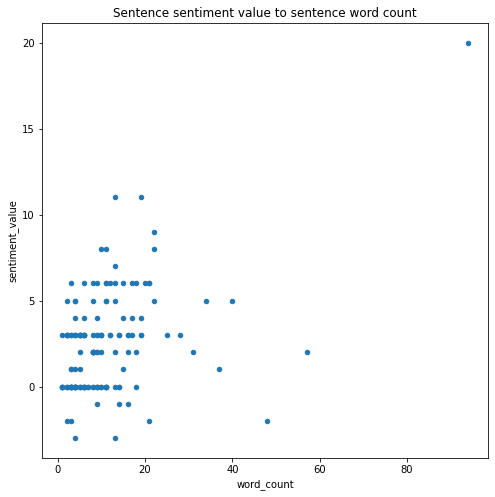

In [42]:
# Correlation analysis
df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')